In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from pandas import Series,DataFrame
from pylab import rcParams
import seaborn as sb
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from math import sqrt
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [2]:
#Data Cleaning

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df.describe()

,Year,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2933 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
LifeExpectancy                     2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [6]:
df.rename(columns={"BMI":"BMI ","LifeExpectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS","thinness  1-19 years":"thinness_1to19_years","thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
country_list = df.Country.unique()
inter = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI ','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [7]:
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [8]:
df['Country'].fillna(method="bfill" , inplace=True)  #categorical

In [9]:
#df.fillna(df.median(skipna=True), inplace=True)

In [10]:
for country in country_list:
    df.loc[df['Country'] == country,inter] = df.loc[df['Country'] == country,inter].interpolate()
    
df.dropna(inplace=True)

In [11]:
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [12]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
under-five deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
Country                     1987 non-null object
Year                        1987 non-null int64
Status                      1987 non-null object
Life_Expectancy             1987 non-null float64
Adult_Mortality             1987 non-null float64
Infant_Deaths               1987 non-null int64
Alcohol                     1987 non-null float64
Percentage_Exp              1987 non-null float64
HepatitisB                  1987 non-null float64
Measles                     1987 non-null int64
BMI                         1987 non-null float64
under-five deaths           1987 non-null int64
Polio                       1987 non-null float64
Tot_Exp                     1987 non-null float64
Diphtheria                  1987 non-null float64
HIV/AIDS                    1987 non-null float64
GDP                         1987 non-null float64
Population                  1987 non-null float64
thi

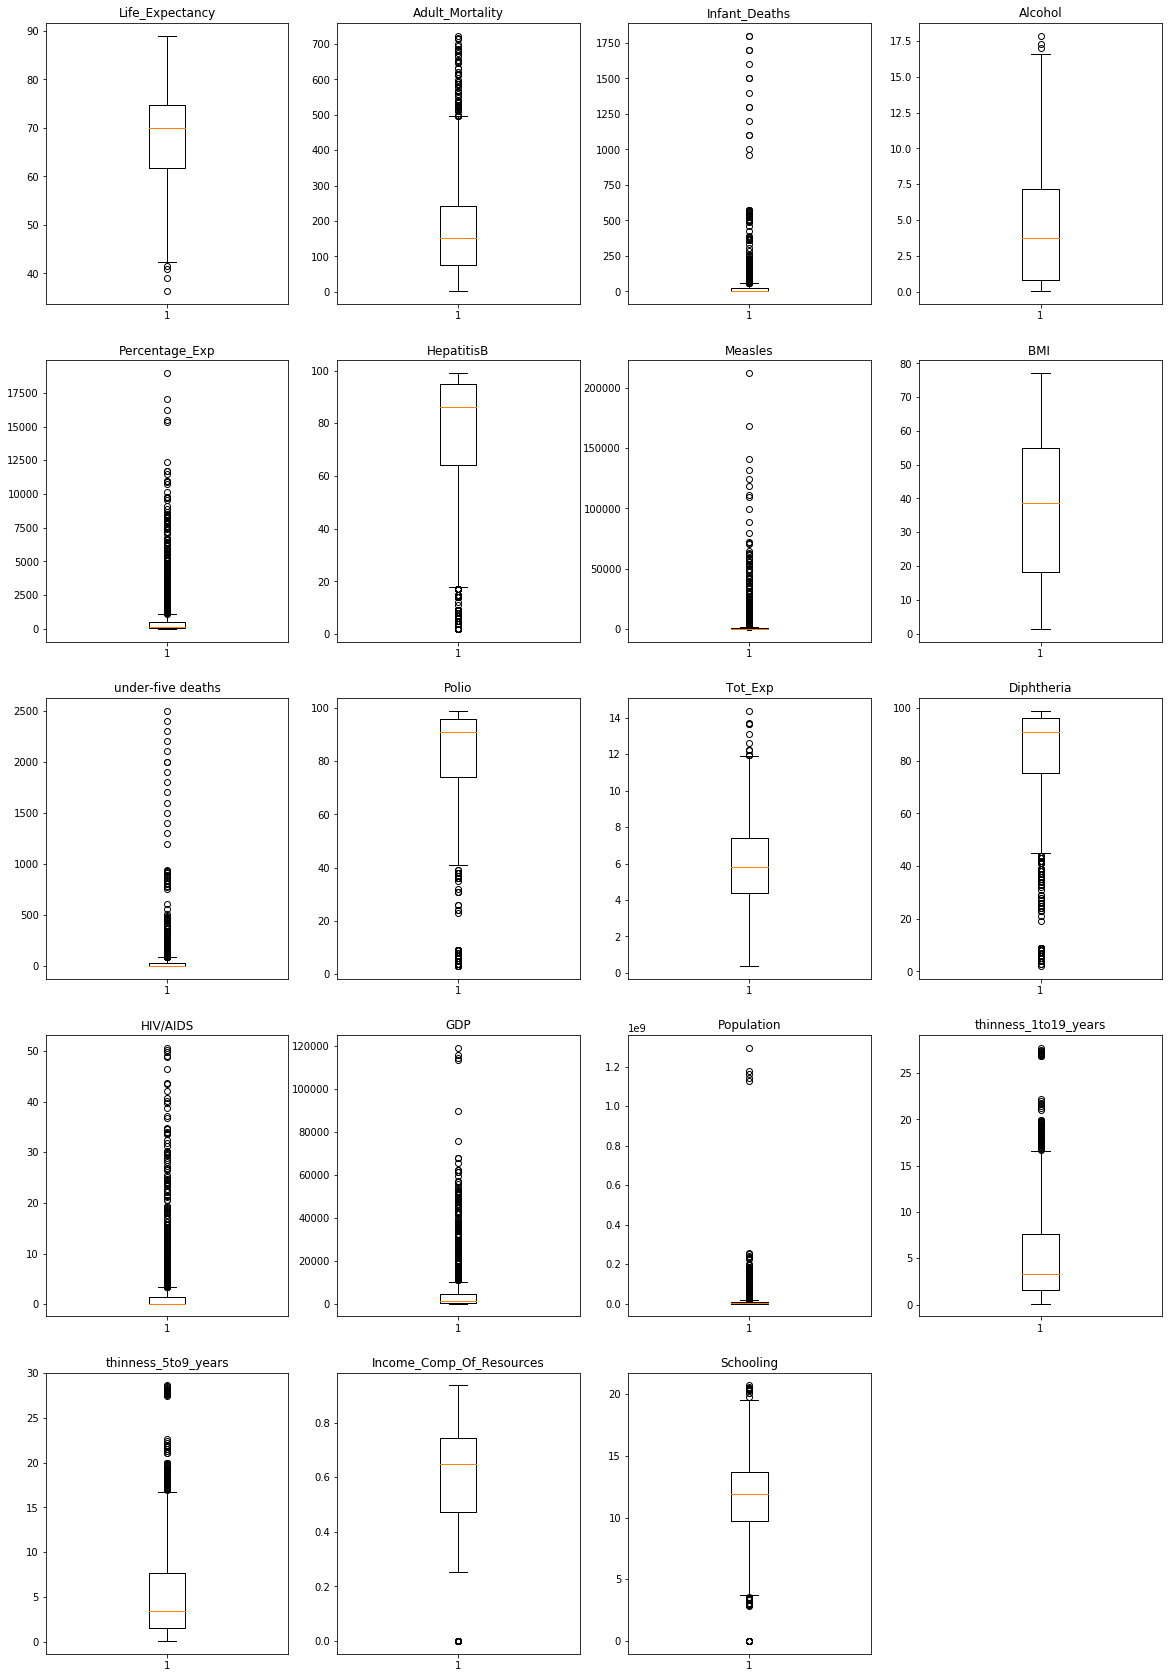

In [14]:
# Creating column of dictionaries
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI ':8,'under-five deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}


#Detecting outliers in each variabale using boxplot

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

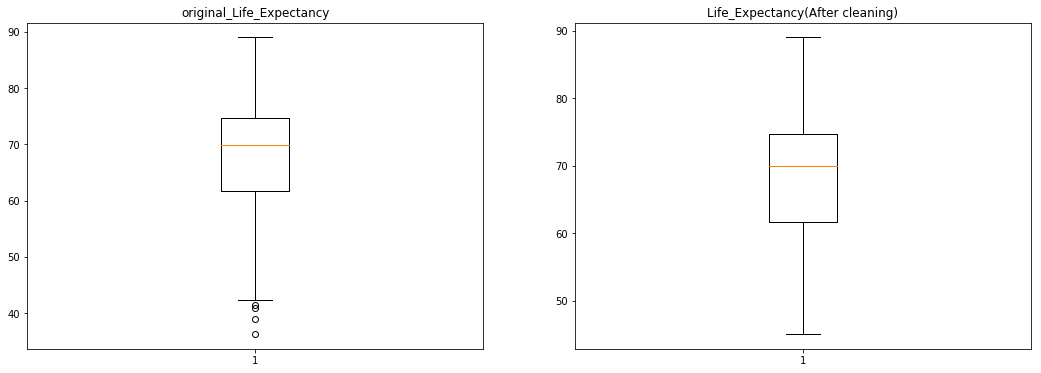

In [15]:

## Removing Outliers in the variables using Winsorization technique.

# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
Life_Expectancy_New = winsorize(df['Life_Expectancy'],(0.01,0))
plt.boxplot(Life_Expectancy_New)
plt.title("Life_Expectancy(After cleaning)")

plt.show()

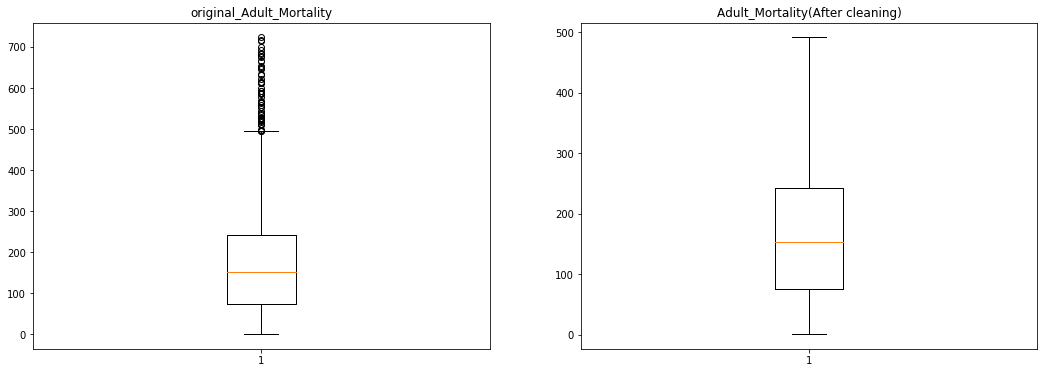

In [16]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
Adult_Mortality_New = winsorize(df['Adult_Mortality'],(0,0.03))
plt.boxplot(Adult_Mortality_New)
plt.title("Adult_Mortality(After cleaning)")

plt.show()

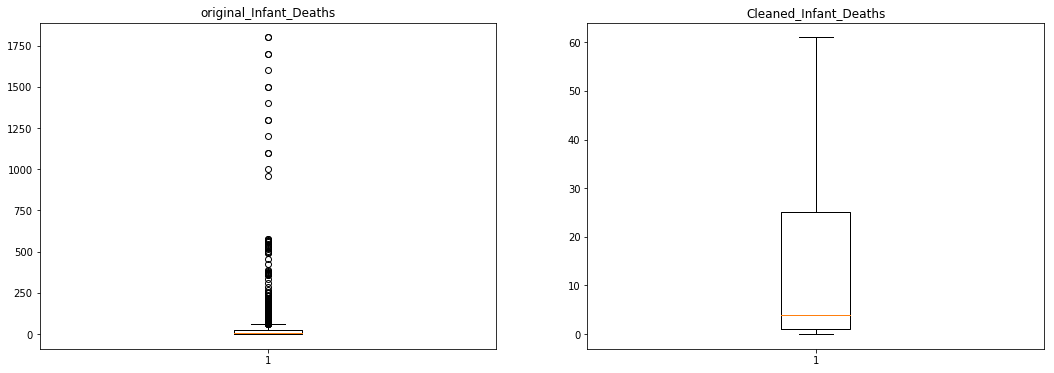

In [17]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
Infant_Deaths_New = winsorize(df['Infant_Deaths'],(0,0.10))
plt.boxplot(Infant_Deaths_New)
plt.title("Cleaned_Infant_Deaths")

plt.show()

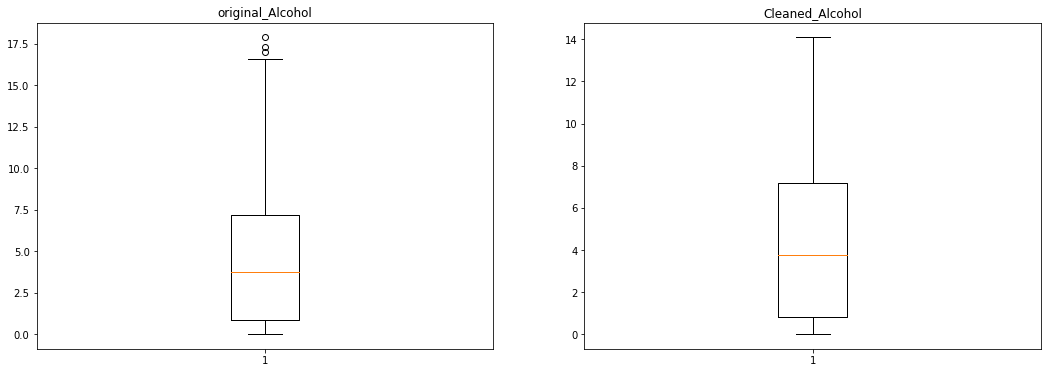

In [18]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
Alcohol_New = winsorize(df['Alcohol'],(0,0.01))
plt.boxplot(Alcohol_New)
plt.title("Cleaned_Alcohol")

plt.show()

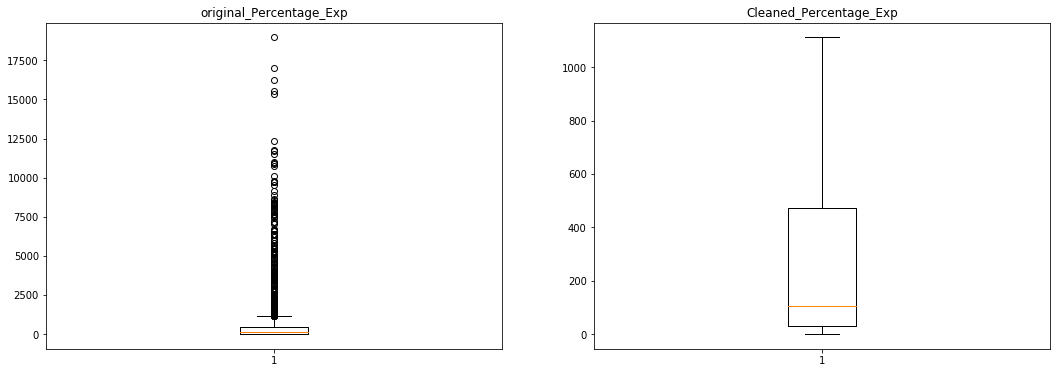

In [19]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
Percentage_Exp_New = winsorize(df['Percentage_Exp'],(0,0.12))
plt.boxplot(Percentage_Exp_New)
plt.title("Cleaned_Percentage_Exp")

plt.show()

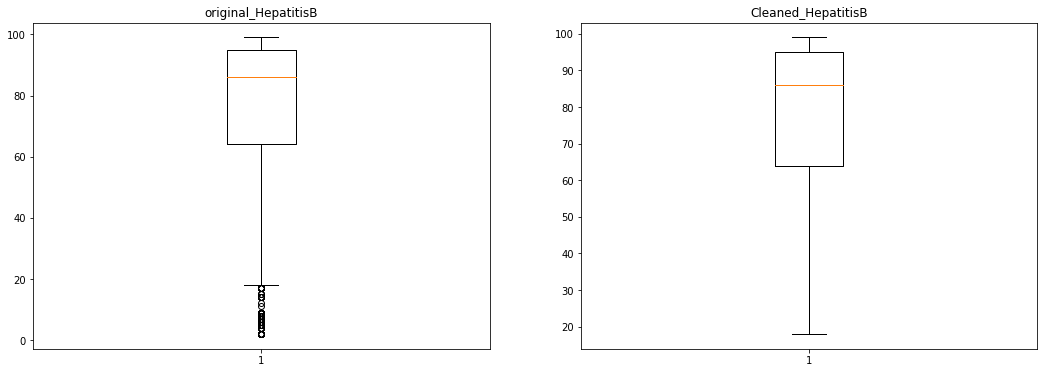

In [20]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
HepatitisB_New = winsorize(df['HepatitisB'],(0.11,0))
plt.boxplot(HepatitisB_New)
plt.title("Cleaned_HepatitisB")

plt.show()

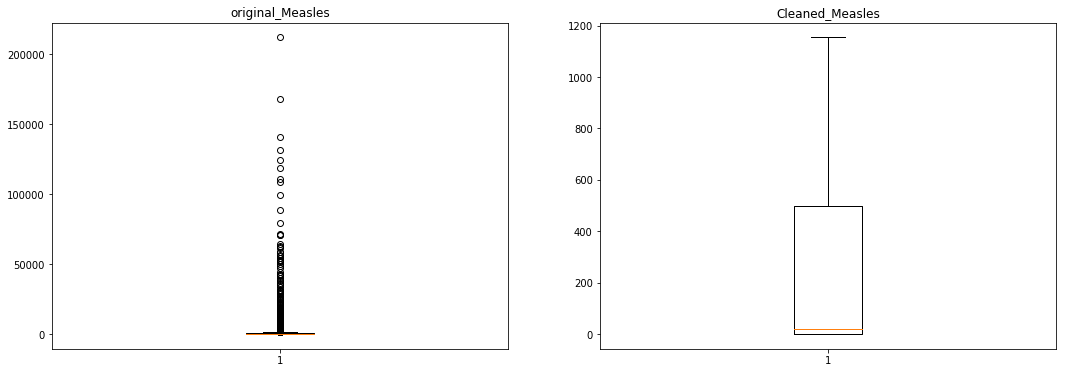

In [21]:

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
Measles_New = winsorize(df['Measles'],(0,0.19))
plt.boxplot(Measles_New)
plt.title("Cleaned_Measles")

plt.show()

In [22]:
# Windsorization alters a large percentage of the data, which may not give better results. Therefore the column will be dropped
Life_Exp = df.drop('Measles',axis=1)

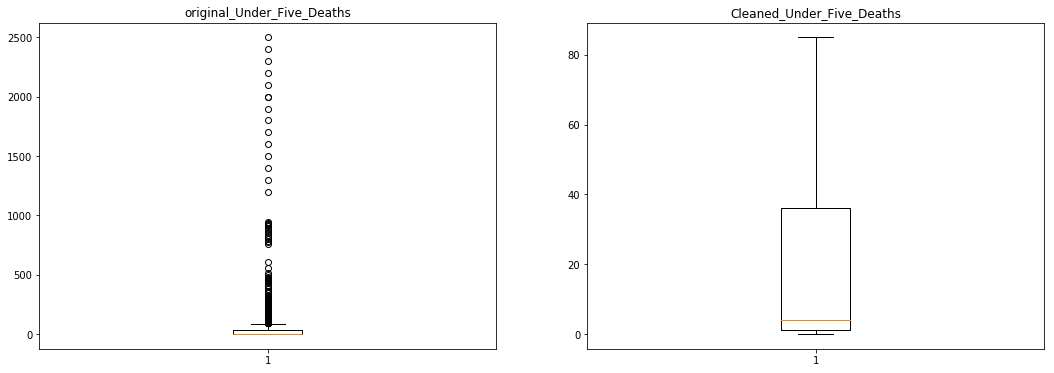

In [23]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['under-five deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
Under_Five_Deaths_New = winsorize(df['under-five deaths'],(0,0.12))
plt.boxplot(Under_Five_Deaths_New)
plt.title("Cleaned_Under_Five_Deaths")

plt.show()

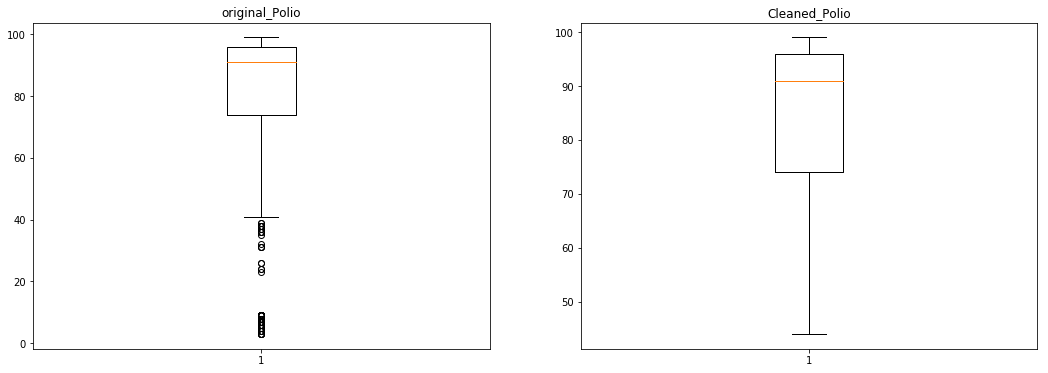

In [24]:

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
Polio_New = winsorize(df['Polio'],(0.09,0))
plt.boxplot(Polio_New)
plt.title("Cleaned_Polio")

plt.show()

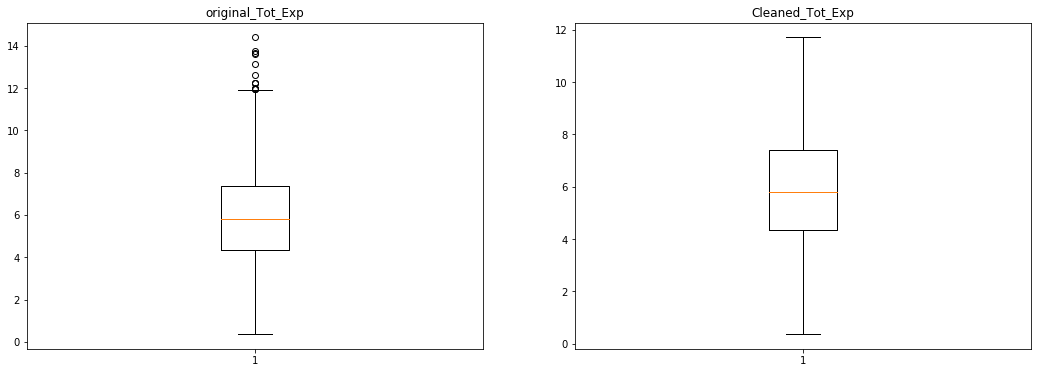

In [25]:

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
Tot_Exp_New = winsorize(df['Tot_Exp'],(0,0.01))
plt.boxplot(Tot_Exp_New)
plt.title("Cleaned_Tot_Exp")

plt.show()

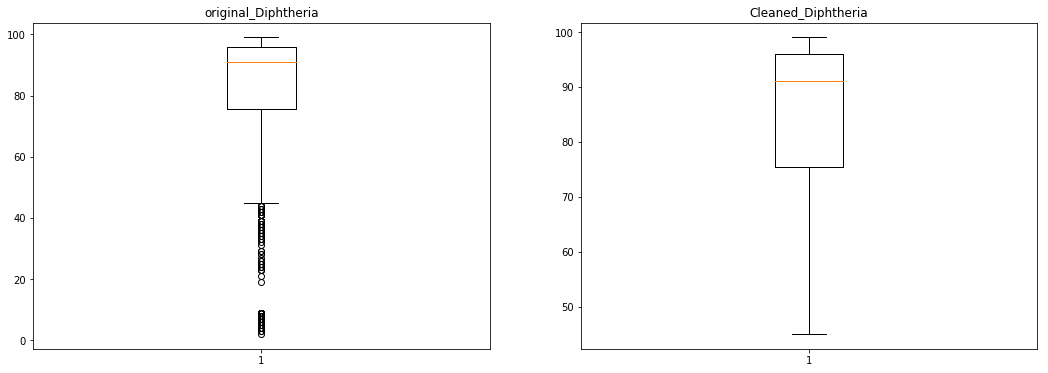

In [26]:

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
Diphtheria_New = winsorize(df['Diphtheria'],(0.10,0))
plt.boxplot(Diphtheria_New)
plt.title("Cleaned_Diphtheria")

plt.show()

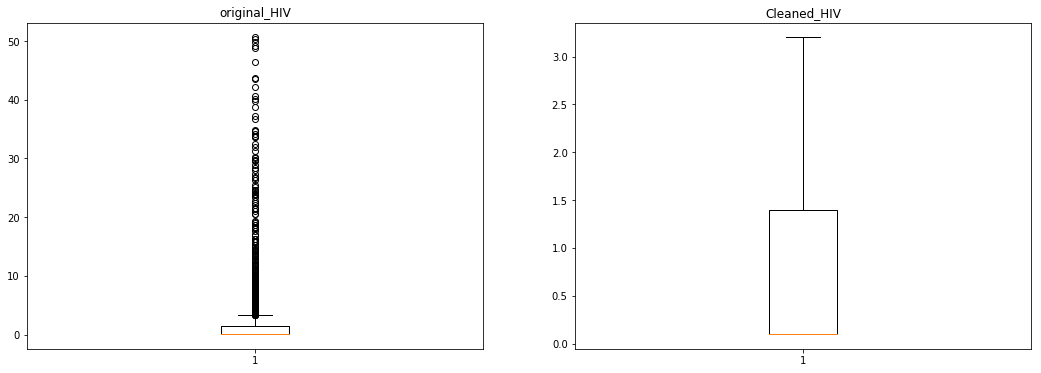

In [27]:

# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
HIV_New = winsorize(df['HIV/AIDS'],(0,0.16))
plt.boxplot(HIV_New)
plt.title("Cleaned_HIV")

plt.show()

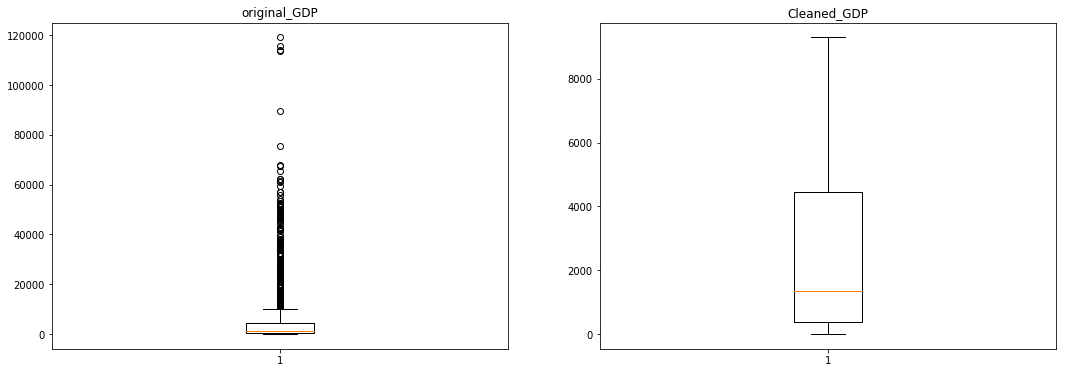

In [28]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
GDP_New = winsorize(df['GDP'],(0,0.13))
plt.boxplot(GDP_New)
plt.title("Cleaned_GDP")
plt.show()

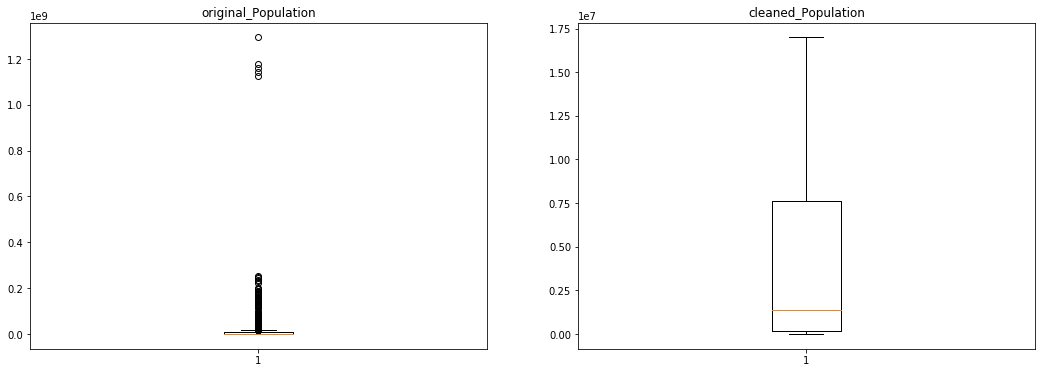

In [29]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
Population_New = winsorize(df['Population'],(0,0.14))
plt.boxplot(Population_New)
plt.title("cleaned_Population")

plt.show()

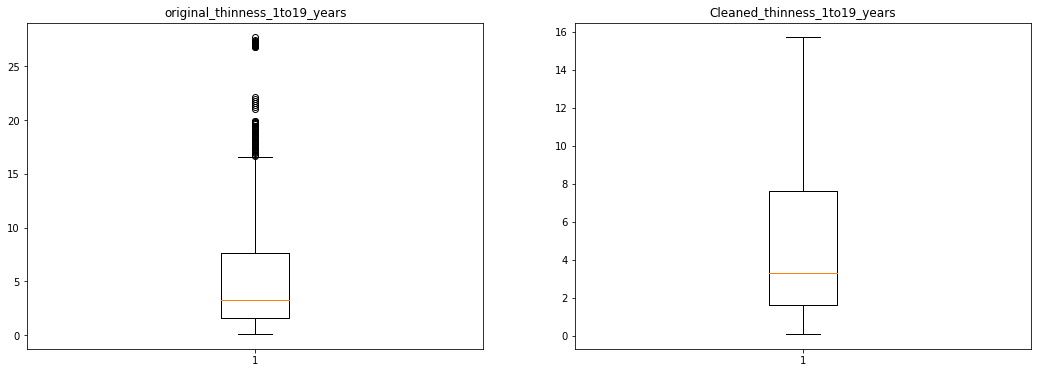

In [30]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
thinness_1to19_years_New = winsorize(df['thinness_1to19_years'],(0,0.04))
plt.boxplot(thinness_1to19_years_New)
plt.title("Cleaned_thinness_1to19_years")

plt.show()

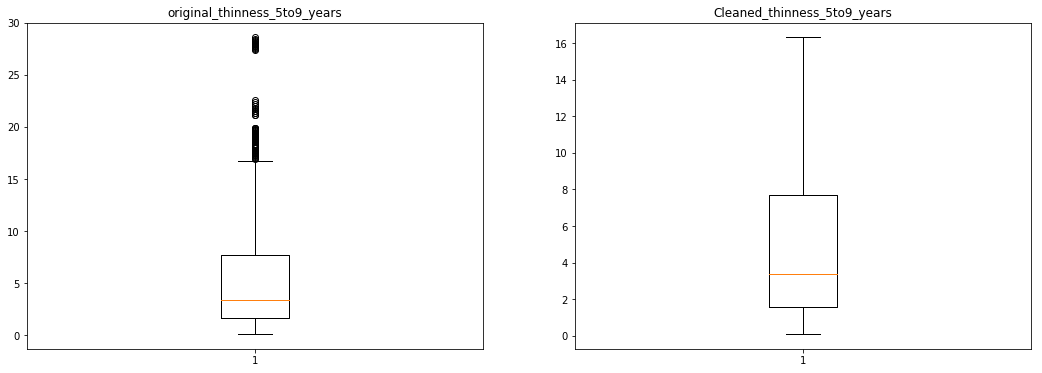

In [31]:

# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
thinness_5to9_years_New = winsorize(df['thinness_5to9_years'],(0,0.04))
plt.boxplot(thinness_5to9_years_New)
plt.title("Cleaned_thinness_5to9_years")

plt.show()

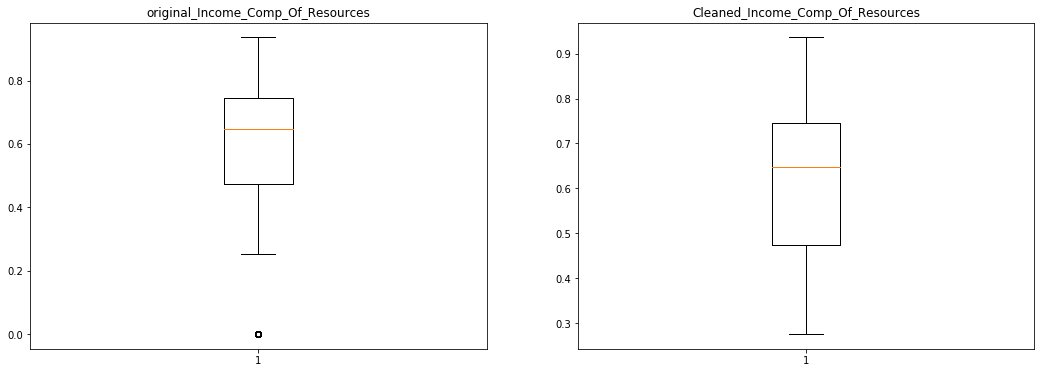

In [32]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
Income_Comp_Of_Resources_New = winsorize(df['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(Income_Comp_Of_Resources_New)
plt.title("Cleaned_Income_Comp_Of_Resources")

plt.show()

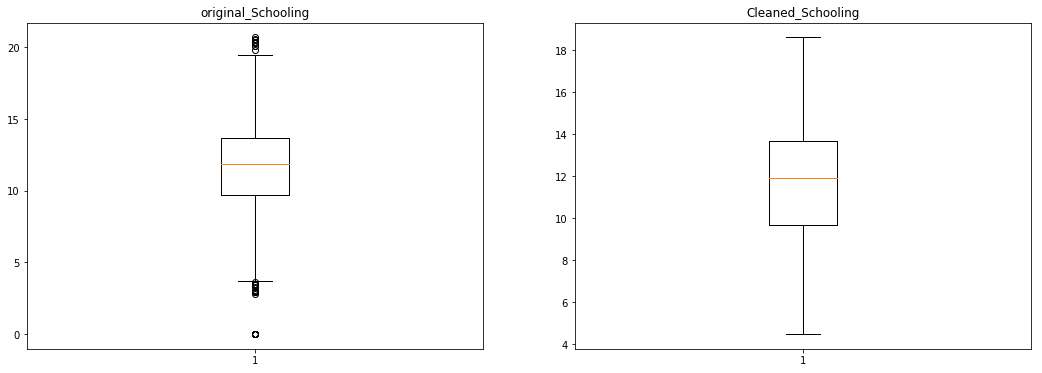

In [33]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
Schooling_New = winsorize(df['Schooling'],(0.02,0.01))
plt.boxplot(Schooling_New)
plt.title("Cleaned_Schooling")

plt.show()

In [34]:
# Check number of Outliers after Winsorization for each variable.
win_list = [Life_Expectancy_New,Adult_Mortality_New,Infant_Deaths_New,Alcohol_New,
            Percentage_Exp_New,HepatitisB_New,Under_Five_Deaths_New,Polio_New,Tot_Exp_New,Diphtheria_New,HIV_New,GDP_New,Population_New,thinness_1to19_years_New,thinness_5to9_years_New,Income_Comp_Of_Resources_New,Schooling_New]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [35]:
# Adding winsorized variables to the data frame.
df['Life_Expectancy_New'] = Life_Expectancy_New
df['Adult_Mortality_New'] = Adult_Mortality_New
df['Infant_Deaths_New'] = Infant_Deaths_New
df['Alcohol_New'] = Alcohol_New
df['Percentage_Exp_New'] = Percentage_Exp_New
df['HepatitisB_New'] = HepatitisB_New
df['Under_Five_Deaths_New'] = Under_Five_Deaths_New
df['Under_Five_Deaths_New'] = Under_Five_Deaths_New
df['Polio_New'] = Polio_New
df['Tot_Exp_New'] = Tot_Exp_New
df['Diphtheria_New'] = Diphtheria_New
df['HIV_New'] = HIV_New
df['GDP_New'] = GDP_New
df['Population_New'] = Population_New
df['thinness_1to19_years_New'] = thinness_1to19_years_New
df['thinness_5to9_years_New'] = thinness_5to9_years_New
df['Income_Comp_Of_Resources_New'] = Income_Comp_Of_Resources_New
df['Schooling_New'] = Schooling_New

In [36]:
df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


In [37]:

# Correlation of winsorized variables
Life_Exp_win =df.iloc[:,22:]
Life_Exp_win['Country'] = df['Country']
Life_Exp_win['Year'] = df['Year']
Life_Exp_win['Status'] = df['Status']
Life_Exp_win_num = Life_Exp_win.iloc[:,:-3]
cormat = Life_Exp_win_num.corr()

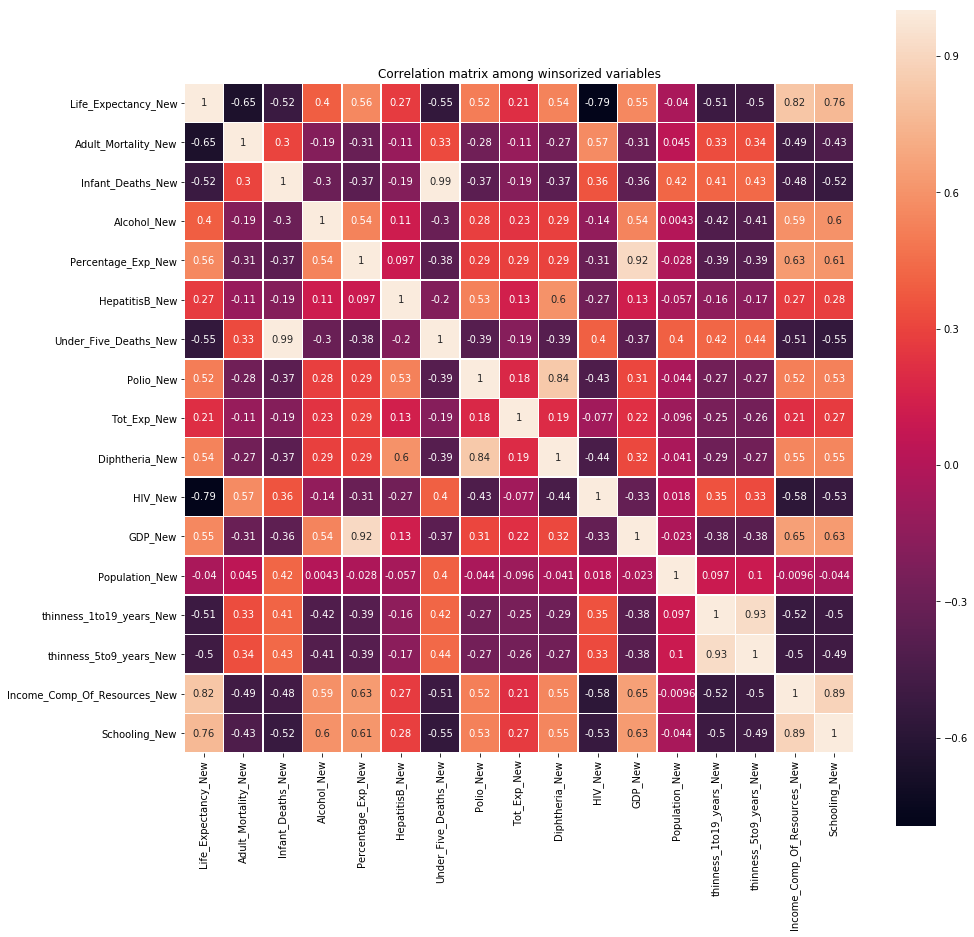

In [38]:

# Using heatmap to confirm inter_relations.
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [39]:
# select desired columns
df = df[['Country', 'Year','Status','BMI ','Life_Expectancy_New','Adult_Mortality_New','Infant_Deaths_New','Alcohol_New','Percentage_Exp_New','HepatitisB_New','Under_Five_Deaths_New','Polio_New','Tot_Exp_New','Diphtheria_New','HIV_New','GDP_New','Population_New','thinness_1to19_years_New','thinness_5to9_years_New','Income_Comp_Of_Resources_New','Schooling_New']]

#write to the file (tab separated)
df.to_csv('New1.csv', index=False,header=True)

In [40]:
#Standardization

In [41]:
df=pd.read_csv("New1.csv")
col=[]
s=dict()
col=[]
for i in df:
    col.append(df[i])
co=col[3:23]
for i in co:
    standard=scale(i,axis=0,with_mean=False,with_std=False)
    stand=scale(standard)
    print(i,":",stand)

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
5       16.7
6       16.2
7       15.7
8       15.2
9       14.7
10      14.2
11      13.8
12      13.4
13      13.0
14      12.6
15      12.2
16      58.0
17      57.2
18      56.5
19      55.8
20      55.1
21      54.3
22      53.5
23      52.6
24      51.7
25       5.8
26      49.9
27      48.9
28      47.9
29      46.9
        ... 
1957    22.8
1958    22.3
1959    21.7
1960    21.2
1961     2.7
1962     2.2
1963    19.7
1964    19.2
1965    18.8
1966    18.4
1967    18.0
1968    17.6
1969    17.3
1970    17.1
1971    16.8
1972    31.3
1973     3.8
1974     3.3
1975    29.9
1976    29.4
1977    29.0
1978    28.6
1979    28.2
1980    27.9
1981    27.5
1982    27.1
1983    26.7
1984    26.3
1985    25.9
1986    25.5
Name: BMI , Length: 1987, dtype: float64 : [-0.8782366  -0.90357721 -0.92891783 ... -0.51333174 -0.53360423
 -0.55387672]
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6      

In [42]:
#Hypothesis Testing

In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_by_country = df.groupby('Status')

In [44]:
df_by_country.describe().head()

Adult_Mortality_New                                                         Alcohol_New                                                            BMI                                                         Diphtheria_New                                                     GDP_New                                                                                         HIV_New                                                  HepatitisB_New                                                     Income_Comp_Of_Resources_New                                                        Infant_Deaths_New                                                  Life_Expectancy_New                                                       Percentage_Exp_New                                                                                      Polio_New                                                     Population_New                                                                                   \
                         count        mean         std  min   25%    50%    75%    max       count       mean       std   min   25%    50%      75%    max   count       mean        std  min     25%   50%     75%   max          count       mean        std   min   25%   50%   75%   max   count         mean          std       min          25%          50%          75%          max   count      mean           std  min  25%  50%  75%  max          count       mean        std   min   25%   50%   75%   max                        count      mean       std    min    25%    50%    75%    max             count       mean        std  min  25%  50%   75%   max               count       mean       std   min     25%    50%   75%   max              count        mean         std       min         25%          50%          75%          max     count       mean        std   min   25%   50%   75%   max          count          mean           std    min        25%        50%         75%         max   
Status                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Developed                285.0   83.094737   51.864003  1.0  61.0   74.0   97.0  229.0       285.0  10.360526  2.367526  0.01  9.50  10.72  12.0000  14.09   285.0  52.891228  16.378910  5.1  54.700  57.5  59.800  69.2          285.0  94.477193   6.782616  45.0  94.0  96.0  98.0  99.0   285.0  6570.832997  3328.740341  12.27733  3472.379770  9291.227619  9291.227619  9291.227619   285.0  0.100000  4.726748e-16  0.1  0.1  0.1  0.1  0.1          285.0  82.554386  23.857293  18.0  85.0  94.0  96.0  99.0                        285.0  0.839730  0.053045  0.703  0.800  0.846  0.882  0.936             285.0   0.782456   1.032078  0.0  0.0  0.0   1.0   4.0               285.0  78.831579  4.180495  69.9  76.000  79.00  81.4  89.0              285.0  771.066308  414.520660  1.576409  373.260553  1111.191325  1111.191325  1111.191325     285.0  94.343860   6.903332  44.0  94.0  96.0  98.0  99.0          285.0  4.512557e+06  5.755050e+06  444.0  297555.00  1622532.0  7492561.00  16993354.0   
Developing              1702.0 

In [45]:
rslt_df1 = df[df['Status']=='Developed'] 
rslt_df1.describe()

,Year,BMI,Life_Expectancy_New,Adult_Mortality_New,Infant_Deaths_New,Alcohol_New,Percentage_Exp_New,HepatitisB_New,Under_Five_Deaths_New,Polio_New,Tot_Exp_New,Diphtheria_New,HIV_New,GDP_New,Population_New,thinness_1to19_years_New,thinness_5to9_years_New,Income_Comp_Of_Resources_New,Schooling_New
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,2.850000e+02,285.000000,2.850000e+02,285.000000,285.000000,285.000000,285.000000
mean,2007.000000,52.891228,78.831579,83.094737,0.782456,10.360526,771.066308,82.554386,0.968421,94.343860,7.140175,94.477193,1.000000e-01,6570.832997,4.512557e+06,1.377895,1.394035,0.839730,15.540702
std,4.328094,16.378910,4.180495,51.864003,1.032078,2.367526,414.520660,23.857293,1.222897,6.903332,2.547277,6.782616,4.726748e-16,3328.740341,5.755050e+06,0.849504,0.934623,0.053045,1.579410
min,2000.000000,5.100000,69.900000,1.000000,0.000000,0.010000,1.576409,18.000000,0.000000,44.000000,1.100000,45.000000,1.000000e-01,12.277330,4.440000e+02,0.300000,0.200000,0.703000,11.500000
25%,2003.000000,54.700000,76.000000,61.000000,0.000000,9.500000,373.260553,85.000000,0.000000,94.000000,6.280000,94.000000,1.000000e-01,3472.379770,2.975550e+05,0.700000,0.700000,0.800000,14.300000
50%,2007.000000,57.500000,79.000000,74.000000,0.000000,10.720000,1111.191325,94.000000,0.000000,96.000000,7.460000,96.000000,1.000000e-01,9291.227619,1.622532e+06,1.000000,1.000000,0.846000,15.700000
75%,2011.000000,59.800000,81.400000,97.000000,1.000000,12.000000,1111.191325,96.000000,2.000000,98.000000,8.860000,98.000000,1.000000e-01,9291.227619,7.492561e+06,2.000000,2.000000,0.882000,16.400000
max,2014.000000,69.200000,89.000000,229.000000,4.000000,14.090000,1111.191325,99.000000,5.000000,99.000000,11.700000,99.000000,1.000000e-01,9291.227619,1.699335e+07,4.000000,4.300000,0.936000,18.600000


In [46]:
rslt_df = df[df['Status']=='Developing'] 
rslt_df.describe()

,Year,BMI,Life_Expectancy_New,Adult_Mortality_New,Infant_Deaths_New,Alcohol_New,Percentage_Exp_New,HepatitisB_New,Under_Five_Deaths_New,Polio_New,Tot_Exp_New,Diphtheria_New,HIV_New,GDP_New,Population_New,thinness_1to19_years_New,thinness_5to9_years_New,Income_Comp_Of_Resources_New,Schooling_New
count,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.00000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1.702000e+03,1702.000000,1702.000000,1702.000000,1702.000000
mean,2006.982374,33.671974,66.187368,187.277321,17.967098,3.45277,228.511363,73.708578,25.216216,81.051116,5.687045,81.341951,1.003702,2244.130881,4.847862e+06,5.554642,5.631845,0.578703,11.008519
std,4.323586,18.893792,9.111133,125.029316,21.595449,3.22130,311.149592,26.745864,31.077064,18.070516,2.147304,17.735482,1.231792,2704.651942,6.291416e+06,4.225124,4.303317,0.159179,2.805725
min,2000.000000,1.400000,45.100000,1.000000,0.000000,0.01000,0.000000,18.000000,0.000000,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,17.525000,59.225000,98.000000,1.000000,0.54000,22.911296,63.000000,1.000000,72.000000,4.280000,73.000000,0.100000,337.258784,1.838942e+05,2.000000,2.000000,0.453000,9.300000
50%,2007.000000,29.800000,67.850000,170.000000,7.000000,2.67000,72.825202,84.000000,8.000000,87.500000,5.550000,88.000000,0.200000,928.977330,1.351370e+06,4.650000,4.700000,0.607000,11.300000
75%,2011.000000,51.175000,73.400000,264.500000,30.000000,5.71750,311.521574,95.000000,42.000000,96.000000,6.927500,96.000000,1.900000,3465.070974,7.674699e+06,8.100000,8.200000,0.706000,12.900000
max,2015.000000,77.100000,89.000000,491.000000,61.000000,14.09000,1111.191325,99.000000,85.000000,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.912000,17.300000


In [47]:
df1=rslt_df.sample(n=200) #developing
#df1.mean()
#df.loc[:,"winsorized_Life_Expectancy"].mean()
mean1=df.loc[:,"Life_Expectancy_New"].mean()
mean1

68.00095621540017

In [48]:
std1=df.loc[:,"Life_Expectancy_New"].std()
std1

9.656675606959237

In [49]:
df2=rslt_df1.sample(n=200) #developed
#df2.mean()
mean2=df2.loc[:,"Life_Expectancy_New"].mean()
mean2

78.81550000000001

In [50]:
std2=df2.loc[:,"Life_Expectancy_New"].std()
std2

4.313122404288088

In [51]:
#logically we wish to prove that the developed countries will have a greater life expectancy due to
#more resources etc etc 
#calculating z

a=pow(std1,2)/200
b=pow(std2,2)/200
m=a+b
z=(mean2-mean1)/sqrt(m)
z

14.460944124540832

In [52]:
#thus p value is zero and we conclude that the life expectancy of developed countries is greater than developing countries

In [53]:
# Assign the dataframe to this variable.
data = pd.read_csv("New1.csv")

# Make and fit the linear regression model

model = LinearRegression()
model.fit(data[["BMI "]],data[["Life_Expectancy_New"]])


# Mak a prediction using the model

prediction = model.predict([[25]])
print(prediction)



[[64.63779237]]


In [54]:
#Visualization

In [55]:
#SCatter plot between Life Expectancy and Income

In [56]:
df=pd.read_csv("New1.csv")

In [57]:
df1=df.sample(20)

Text(0.5,1,'LifeExpectancy vs Income_Comp_Of_Resources')

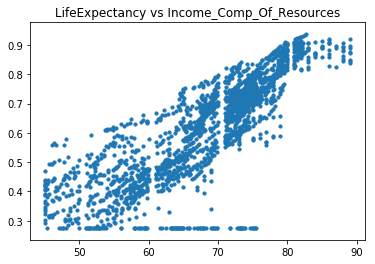

In [58]:
plt.scatter(df["Life_Expectancy_New"], df["Income_Comp_Of_Resources_New"],10)
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

Text(0.5,1,'LifeExpectancy_Sample vs Income_Comp_Of_Resources_Sample')

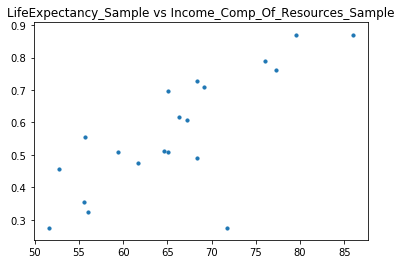

In [59]:
plt.scatter(df1["Life_Expectancy_New"], df1["Income_Comp_Of_Resources_New"],10)
plt.title("LifeExpectancy_Sample vs Income_Comp_Of_Resources_Sample")

In [61]:
denominator=df1["Life_Expectancy_New"].dot(df1["Life_Expectancy_New"])-df1["Life_Expectancy_New"].mean()*df1["Life_Expectancy_New"].sum()

In [62]:
m=(df1["Life_Expectancy_New"].dot(df1['Income_Comp_Of_Resources_New'])-df1['Income_Comp_Of_Resources_New'].mean() *df1["Life_Expectancy_New"].sum())/denominator
b=(df1['Income_Comp_Of_Resources_New'].mean()*df1["Life_Expectancy_New"].dot(df1["Life_Expectancy_New"])-df1["Life_Expectancy_New"].mean()*df1["Life_Expectancy_New"].dot(df1['Income_Comp_Of_Resources_New']))/denominator

In [63]:
y_pred=m*df1["Life_Expectancy_New"]+b

Text(0.5,1,'LifeExpectancy vs Income_Comp_Of_Resources')

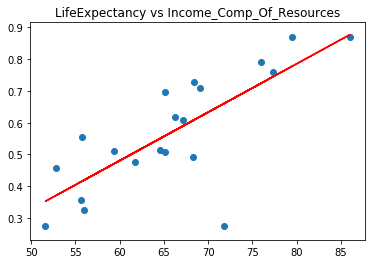

In [64]:
plt.scatter(df1["Life_Expectancy_New"],df1['Income_Comp_Of_Resources_New'])
plt.plot(df1["Life_Expectancy_New"],y_pred,'r')
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

In [65]:
print("The correlation coefficient between Life Expectancy and Income Composition of resources is: ",df["Life_Expectancy_New"].corr(df['Income_Comp_Of_Resources_New']))

The correlation coefficient between Life Expectancy and Income Composition of resources is:  0.823221538041162


In [66]:
print("The correlation coefficient between Life Expectancy and Income Composition of resources(Sample) is: ",df1["Life_Expectancy_New"].corr(df1['Income_Comp_Of_Resources_New']))

The correlation coefficient between Life Expectancy and Income Composition of resources(Sample) is:  0.7638833270507719


In [67]:
#Scatter plot between Schooling and Income

Text(0.5,1,'Schooling vs Income_Comp_Of_Resources')

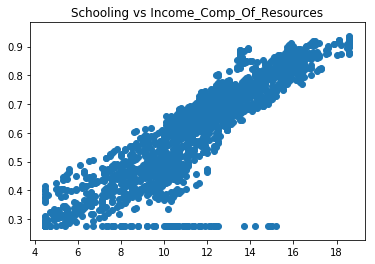

In [68]:
plt.scatter(df["Schooling_New"], df["Income_Comp_Of_Resources_New"])
plt.title("Schooling vs Income_Comp_Of_Resources")

Text(0.5,1,'Schooling_Sample vs Income_Comp_Of_Resources_Sample')

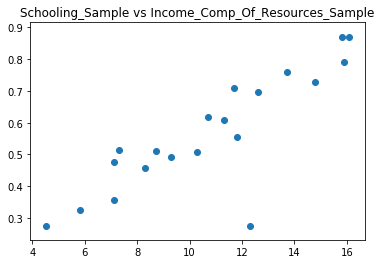

In [69]:
plt.scatter(df1["Schooling_New"], df1["Income_Comp_Of_Resources_New"])
plt.title("Schooling_Sample vs Income_Comp_Of_Resources_Sample")

In [70]:
denominator1=df1["Schooling_New"].dot(df1["Schooling_New"])-df1["Schooling_New"].mean()*df1["Schooling_New"].sum()

In [71]:
m1=(df1["Schooling_New"].dot(df1['Income_Comp_Of_Resources_New'])-df1['Income_Comp_Of_Resources_New'].mean() *df1["Schooling_New"].sum())/denominator1
b1=(df1['Income_Comp_Of_Resources_New'].mean()*df1["Schooling_New"].dot(df1["Schooling_New"])-df1["Schooling_New"].mean()*df1["Schooling_New"].dot(df1['Income_Comp_Of_Resources_New']))/denominator1

In [72]:
y_pred=m1*df1["Schooling_New"]+b1

Text(0.5,1,'Schooling vs Income_Comp_Of_Resources')

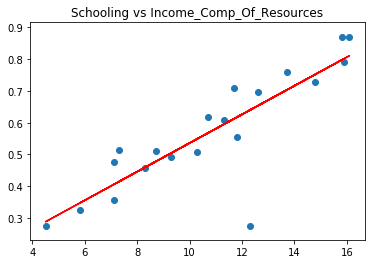

In [73]:
plt.scatter(df1["Schooling_New"],df1['Income_Comp_Of_Resources_New'])
plt.plot(df1["Schooling_New"],y_pred,'r')
plt.title("Schooling vs Income_Comp_Of_Resources")

In [74]:
print("The correlation coefficient between Life Expectancy and Income Composition of resources is: ",df["Schooling_New"].corr(df['Income_Comp_Of_Resources_New']))

The correlation coefficient between Life Expectancy and Income Composition of resources is:  0.8863855843949852


In [75]:
print("The correlation coefficient between Life Expectancy and Income Composition of resources(Sample) is: ",df1["Schooling_New"].corr(df1['Income_Comp_Of_Resources_New']))

The correlation coefficient between Life Expectancy and Income Composition of resources(Sample) is:  0.846564425782161


In [76]:
#Histogram to show the variation of Life Expectancy over the years in developed and developing countries

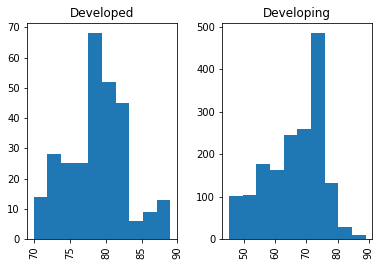

In [77]:
df['Life_Expectancy_New'].hist(by=df['Status'])
plt.show()

In [78]:
#Bar graph to show the Average life expectancy of developed and deveoping countries

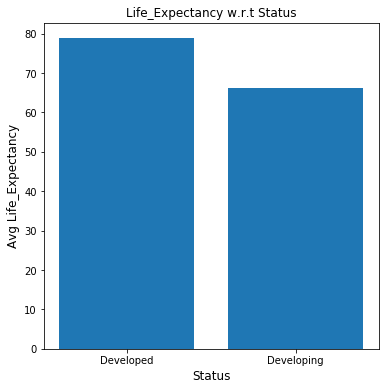

In [79]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_Expectancy_New'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [80]:
# Life_Expectancy w.r.t Year using bar plot.

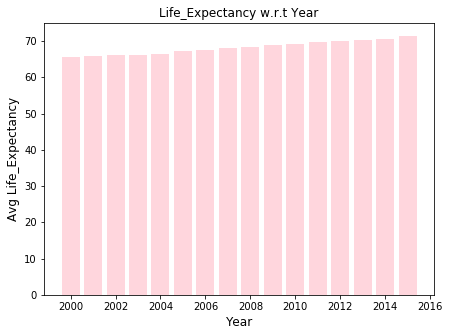

In [81]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Life_Expectancy_New'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()